In [8]:
# numpy 입력
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

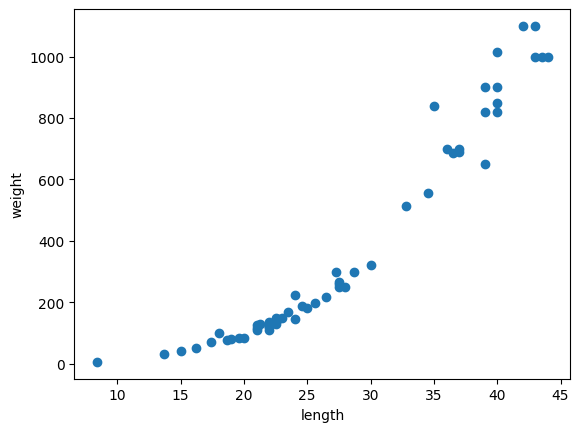

In [9]:
#matplotlib을 이용한 시각화 작업
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

pyplot은 파이썬의 데이터 시각화 라이브러리인 matplotlib의 서브 모듈로 그래프를 그릴 수 있도록 도와주는 도구이다.

In [11]:
#모델 훈련 세트 준비 및 학습/테스트 입력값 출력
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input)
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


train_input은 훈련데이터 x축(입력값)의 역할을 하고, train_target은 훈련데이터 y축(정답값)의 역할을 하고, test_input은 테스트 데이터 x축(입력값)의 역할을 하고, test_target은 테스트 데이터 y축(정닶값)의 역할을 한다.

In [12]:
#회귀 모델 훈련 1에 가까울수록 정확도가 높다.
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)


0.992809406101064

knr.fit는 모델을 학습시키는 함수이다.

In [13]:
#평균절대오차
from sklearn.metrics import mean_absolute_error

test_perdiction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_perdiction) #평균에서 얼마나 벌어졌는지 계산해서 알려주는 식
print(mae) #평균19.xxx만큼 차이가 난다.

19.157142857142862


mae는 예측값과 실제값이 차이의 절댓값들의 평균이고 머신러닝과 통계에서 자주 쓰이는 오차 측정 지표 중 하나이다.

In [16]:
#이웃 개수 줄이기
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


knr.score()은 모델의 예측 성능을 평가하는 함수이다.
knr.score(train_input, train_target)이렇게 쓰면 test_input에 대해 얼마나 정확하게 test_target을 예측했는지 R2값으로 알려준다.

In [21]:
print(knr.predict([[100]]))

[1033.33333333]


knr.predict는 훈련된 모델이 새로운 입력값에 대해 예측값을 출력하는 함수이다.

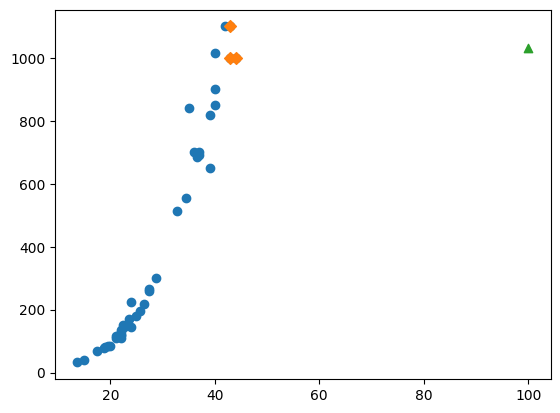

In [23]:
#100cm 농어의 이웃을 구하는 식
distance, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그리는 식
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그리는 식
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100CM 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.show()

In [25]:
#x와 y값의 관계가 선형적으로 올라가는 선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대한 예측
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


sklearn -> KNeighborsClassifier, KNeighborsRegressor, LinearRegression

50cm인 농어가 1241이 나왔을경우 무게가 1.24kg라고 예측한다는 것을 알 수 있고, y=ax+b 이때 a(기울기)가 coef를 의미 b(y값)가 intercept를 의미

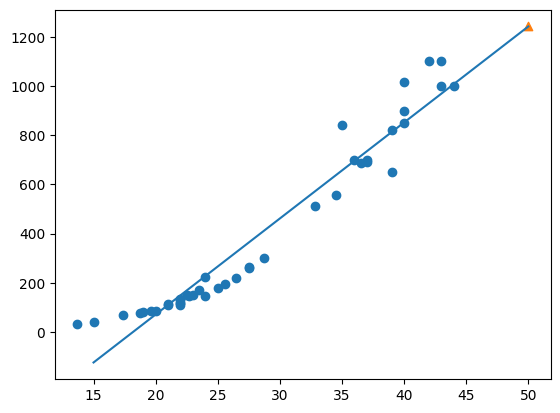

0.939846333997604
0.8247503123313558


In [27]:
#훈련 세트의 산점도를 그리는 식
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프를 그리는 식
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker ='^')
plt.show()

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

#이때 lr은 LinearRegression을 의미

선형회귀 직선그래프를 보았을 때 빨간 세모가 예측값인데 y값이 1200을 살짝 상회하는 것을보아 예측값인 1241에 맞는 그래프라고 볼 수 있다. 추가로 곡선 그래프가 있는데 그것은 3차방정식(y = ax^2 + bx + c)을 이용하여 예측값을 구한다.

In [30]:
#다항 회귀
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(test_poly)
print(train_poly)

[[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [1892.25   43.5 ]
 [ 262.44   16.2 ]
 [ 784.     28.  ]
 [ 745.29   27.3 ]]
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.    

In [45]:
#모델 다시 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.score(train_target, train_target))

[1573.98423528]


ValueError: Expected 2D array, got 1D array instead:
array=[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

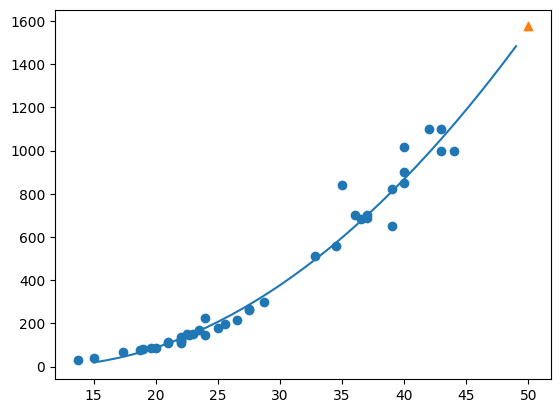

0.9706807451768623
0.9775935108325122


In [44]:
#구간별 직선으로 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

#훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그리는 식
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))